# Regressão Linear em Dados de Ecommerce

Uma empresa de comércio eletrônico em Nova York, que atua na venda de roupas e oferece consultorias de estilo presenciais, busca otimizar sua estratégia digital. Com opções de compra disponíveis tanto no site quanto no aplicativo móvel, a empresa precisa identificar qual dessas plataformas tem maior impacto no comportamento de compra dos clientes para direcionar melhor seus investimentos e esforços de melhoria. 

Para responder a essa pergunta de negócio, será implementada a técnica de regressão linear. Essa abordagem permitirá quantificar o impacto de variáveis relacionadas ao uso do site e do aplicativo sobre as vendas, fornecendo uma base analítica sólida para a tomada de decisão estratégica. 

O principal objetivo é identificar qual dessas plataformas exerce maior influência sobre as vendas e a interação com os clientes, fornecendo embasamento para decisões sobre alocação de recursos e otimização de estratégias. A análise será conduzida aplicando métodos estatísticos para gerar insights robustos e de alto impacto para o negócio.

## Importação das dependências utilizadas


In [3]:
# Pacotes de manipulação de dados
import pandas as pd
import numpy as np

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#Configuração de lay-out
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

# Pacotes de modelagem
import statsmodels as sms
import statsmodels.api as sm

# Pacotes de testes estatísticos
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_white

## 1. Preparação dos Dados



O arquivo CSV ecommerce-customers possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* **Avg. Session Length:** Tempo médio das sessões de consultoria de estilo na loja.
* **Time on App:** tempo médio gasto no app em minutos.
* **Time on Website:** tempo médio gasto no site em minutos.
* **Lenght of Membership:** Há quantos anos o cliente é membro.
* **Yearly Amount Spent:** Valor anual gasto em dólares.


In [5]:
# Importação da base
clientes = pd.read_csv("ecommerce-customers.csv")

In [6]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
clientes.duplicated().sum()

np.int64(0)

<br><br>
Na análise inicial de preparação dos dados, a base extraída do Kaggle apresenta-se bem estruturada e livre de inconsistências aparentes.

* Total de **500** registros.
* Total de **8** colunas, sendo **5** numéricas do tipo ***float*** e **3** categóricas do tipo ***object***.
* Não foram encontrados nenhum valor nulo.
* Sem valores duplicados.
<br><br>

## 2. Análise exploratória dos dados


### 2.1 Coeficiente de Pearson

<Axes: >

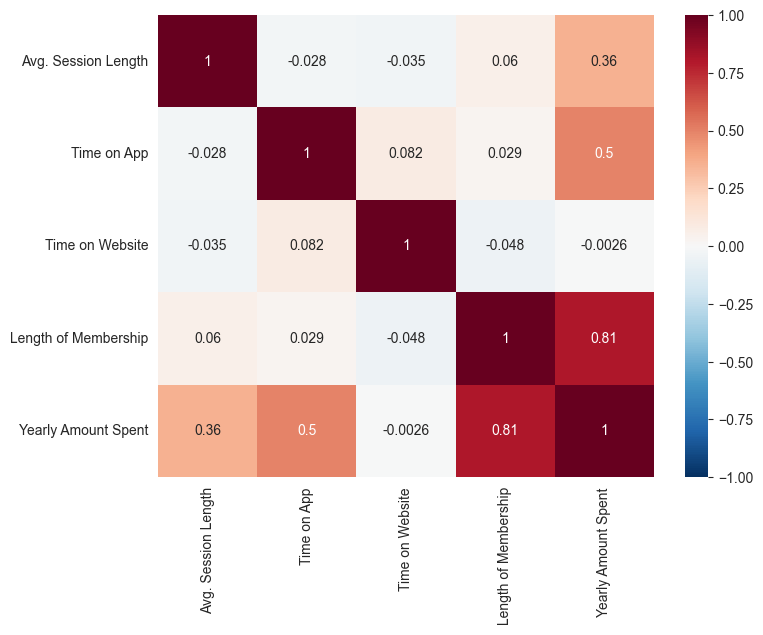

In [9]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(clientes.drop(['Email','Address','Avatar'],axis=1).corr(), 
            cmap='RdBu_r', 
            vmin=-1, vmax=1, 
            annot=True)

* Observou-se que o tempo no website tem correlação mínima com o valor gasto anualmente pelos clientes
* A variável com maior impacto no gasto anual é o tempo de associação do cliente.
* A segunda variável mais influente no valor anual gasto é o tempo dedicado ao aplicativo.

**Obs.:** Nenhuma das variáveis explicativas são altamente correlacionadas, portanto não haverá problemas de **multicolinearidade** na estimação dos coeficientes. 

### 2.2 Explorando a linearidade correlacional das variáveis. 

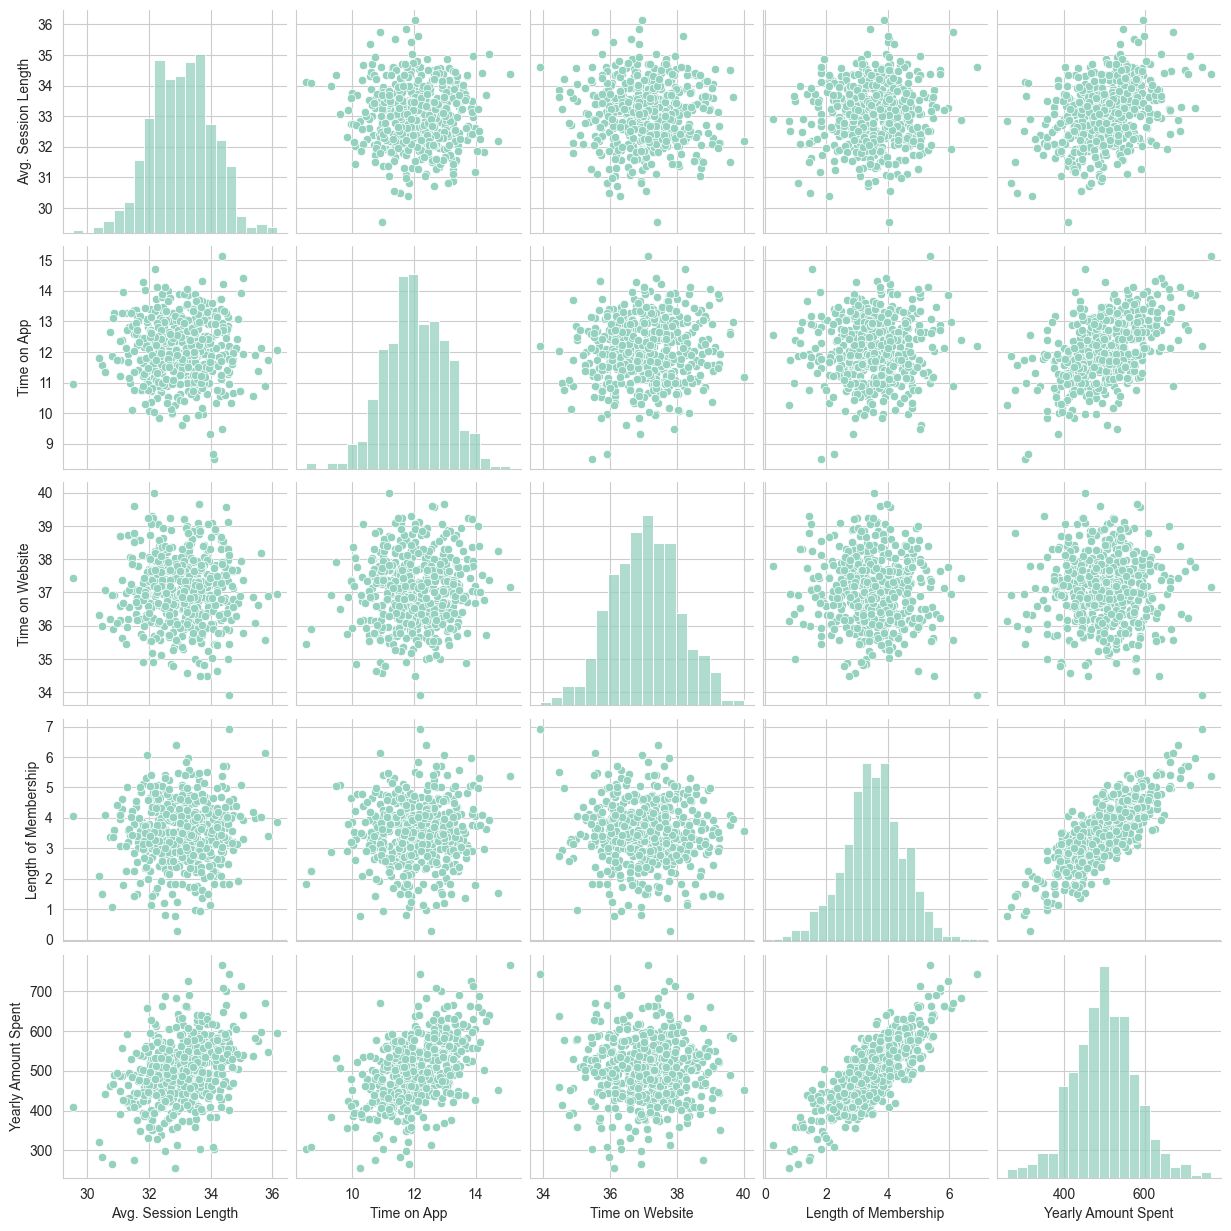

In [20]:
sns.pairplot(clientes)

Percebemos que os valores que mais se relacionam linearmente com os total dos valores gastos não ano são:
* **Lenght of Membership:** Há quantos anos o cliente é membro.
* **Time on App:** tempo médio gasto no app em minutos.

## 3. Ajuste do modelo.

In [10]:
# Variavel Resposta
y = clientes['Yearly Amount Spent']

# Variavel explicativa
clientes['Intercepto'] = 1
x = clientes.drop(['Email','Address','Avatar','Yearly Amount Spent','Time on Website'],axis=1)

In [11]:
# Ajuste do Modelo
modelo = sm.OLS(y,x) #Minimos Quadrados Ordinários (Processo de ajuste do modelo = Como ele vai encontrar o melhor beta 0 e melhor beta 1 que minimizam o erro) 
#ORDINARY LIST SQUARE
resultado = modelo.fit()

In [12]:
print(resultado.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                 1.036e+04
Date:                 Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                         11:03:39   Log-Likelihood:                -1857.4
No. Observations:                  500   AIC:                             3723.
Df Residuals:                      496   BIC:                             3740.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length   

Ao verificarmos o **score de variância** (R²),  vemos que as variáveis explicativas desse modelo explicam **`98,4%`** da variabilidade dos gastos.

**Obs.:** Ao retirarmos a variável **tempo gasto** do modelo, devido a ausência de correlação com a variável target (valor anual gasto), melhoramos a interpretabilidade do modelo.<br>
No processo de ajuste do modelo, essa variável apresentou o coeficente negativo, e com P-valor do teste de hipótese em **0,326** indicando que há evidência estatística o suficiente para admitirmos a hipótese nula de igualdade 0 do coeficiente. Portanto à excluímos do modelo.

### 3.1 Equação do Modelo

 #### Valor total de vendas = **$\beta_1$** * Lenght of Membership + **$\beta_2$** * Time on App + **$\beta_3$** * Avg. Session Length <br>
 Onde:<br>
 **$\beta_1$** = 61,55 <br>
 **$\beta_2$** = 38,74 <br>
 **$\beta_3$** = 25,72 <br>

## 4. Diagnóstico do Modelo

### 4.1 Análise dos Resíduos

Antes de **utilizarmos o modelo** é importante **avaliarmos os resíduos** (diferenca entre os valores estimados e os valores observados), para garantir que o modelo esteja bem ajustado e que as premissas nao foram violadas.

In [1]:
# Estamos definindo uma função chamada grafico_residuos que aceita um argumento chamado resultado. Essa função será usada para criar um gráfico de resíduos.

def grafico_residuos(resultado): 
   
    #Estamos criando um gráfico de dispersão (scatter plot) usando a biblioteca Seaborn (sns).
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))), #O eixo x do gráfico é uma lista de números inteiros de 0 até o comprimento dos resíduos (ou seja, o número de observações).
                                 y=resultado.resid_pearson.tolist()) #O eixo y é a lista de resíduos (ou erros de previsão).
    
    
    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist() # Primeiro, criamos uma lista auxiliar r_aux contendo os valores dos resíduos.
    r_aux.append(-3) # Adicionamos -3 ao final dessa lista para garantir que o valor mínimo dos resíduos esteja incluído.
    ymin = min(r_aux) * 1.1 # Calculamos ymin multiplicando o valor mínimo dos resíduos por 1.1 (para dar um espaço extra na parte inferior do gráfico).
    
    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1
    
    resid_graf.set(ylim=(ymin, ymax)) # Definimos os limites do eixo y do gráfico para que ele abranja os valores mínimos e máximos dos resíduos.
    
    ax1 = resid_graf.axes 
    ax1.axhline( 0, color='grey', ls='--')
    ax1.axhline(-2, color='grey', ls='--')
    ax1.axhline(+2, color='grey', ls='--')
    plt.show()

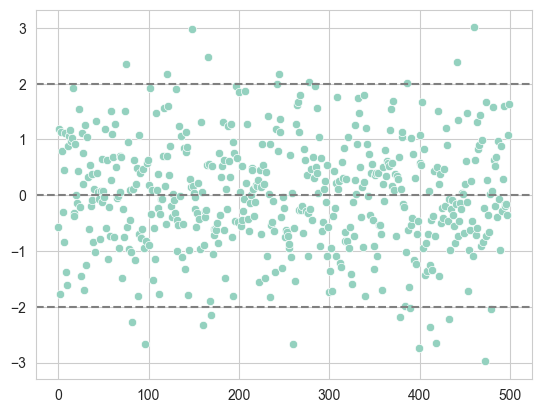

In [69]:
grafico_residuos(resultado)

#### 4.1.1 Normalidade dos resíduos

É importante avaliarmos a normalidade dos resíduos, para garantir que o modelo esteja ajustado de forma não enviesada, ou seja, os erros de estimativas (resíduos) ocorrem de forma aleatória, de acordo com uma distribuição normal.

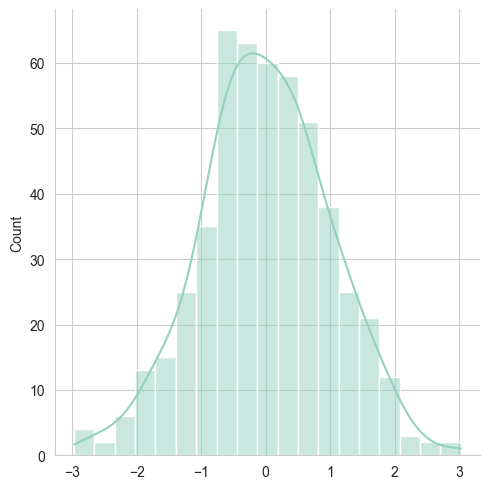

In [73]:
sns.displot(resultado.resid_pearson,kde=True);

In [76]:
normalidade = shapiro(resultado.resid_pearson)
print('Estatística = %.3f, p-valor = %.3f\n' % (normalidade.statistic, normalidade.pvalue))

Estatística = 0.998, p-valor = 0.879



#### 4.1.2 Diagnóstico dos Resíduos

Verificamos com a interpretação gráfica, que os resíduos (diferença entre os valores estimados e os valores observados) seguem uma distrubuição normal, reiterado pelo teste de hipótese, onde a hipótese nula é que a distribuições dos resíduos é gaussiana (normal), com um P-Valor calculado de **`87,8%`**.

### 4.2 Homocedasticidade 

Outro fator importante que deve ser avaliado no modelo é a homocedasticidade dos resíduos, que deve ser homogênia, ou seja, essa variância não deve mudar de acordo com o valor das variáveis explicativas.

In [14]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
white_test = het_white(resultado.resid_pearson,
                       resultado.model.exog)
print(dict(zip(labels, white_test)))

{'LM Statistic': np.float64(9.426584550365769), 'LM-Test p-value': np.float64(0.39886381413805466), 'F-Statistic': np.float64(1.0461740132878012), 'F-Test p-value': np.float64(0.4018478863142027)}


Com o teste de hipótese aplicado ao modelo, para validarmos a homocedasticidade dos resíduos, vemos que existe evidência estatística o suficiente para caracterizar que os resíduos apresentam um comportamento homogênio, com plausibilidade do P-valor em **`40,18%`** 

## 5. Interpretabilidade do modelo

#### Valor total de vendas = **61,27** * Lenght of Membership + **38,59** * Time on App + **25,98** * Avg. Session Length <br>

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares.<br>
**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.<br>
**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.


## 6. Conclusão

A análise conduzida oferece insights robustos e direcionados sobre os fatores que influenciam o comportamento de compra dos clientes da empresa. Com um modelo de regressão linear altamente ajustado (R² de 98,4%) e testes que confirmam a validade estatística das premissas, é possível concluir que o tempo de associação ao programa de membros (Length of Membership) e o tempo gasto no aplicativo móvel (Time on App) são os principais motores do valor anual gasto pelos clientes.

### 6.1 Respostas às Perguntas de Negócio
Qual plataforma tem maior impacto nas vendas?
A análise indica que o aplicativo móvel exerce uma influência considerável sobre os gastos, enquanto o site mostrou uma correlação mínima com o comportamento de compra.

### 6.2 Como priorizar os investimentos e esforços?
Com base na análise, direcionar recursos para aprimorar a experiência no aplicativo móvel e fortalecer os programas de associação de clientes é essencial para maximizar o retorno sobre o investimento.

### 6.3 Estratégias Corporativas e Medidas Recomendadas
1. Fortalecimento do Programa de Associação
* **Benefícios adicionais para membros antigos**: introduzir benefícios exclusivos, como descontos progressivos com o tempo de associação.<br>
* **Engajamento contínuo**: promover interações frequentes, como newsletters personalizadas e convites para eventos exclusivos.
* **Fidelização e recompensas**: implementar um programa de pontos que incentive compras recorrentes e longas associações.

2. Aprimoramento do Aplicativo Móvel
* **Otimização da experiência do usuário**: melhorar a interface e funcionalidade do aplicativo para engajar os clientes e aumentar o tempo de uso.
* **Incorporar ferramentas personalizadas**: oferecer recomendações de produtos baseadas no histórico de compras e comportamento no app.
* **Campanhas promocionais no app**: criar promoções exclusivas para compras realizadas pelo aplicativo, incentivando sua utilização.